# Creating CSV file and short data exploration

In [1]:
import pandas as pd
PATH_TO_CSV = '../Dataset_Willys_2020/CSV/'
df = pd.read_csv(PATH_TO_CSV +'/'+ 'CATEGORIES.csv')
PATH_TO_IMG = '../Dataset_Willys_2020/ORGINAL/'
df.head(25)

,category,number_of_images,path_to_img
0,husdjur,381,../Dataset_Willys_2020/ORGINAL/husdjur/
1,fisk_skaldjur,139,../Dataset_Willys_2020/ORGINAL/fisk_skaldjur/
2,apotek,74,../Dataset_Willys_2020/ORGINAL/apotek/
3,mejeri_ost_agg,1057,../Dataset_Willys_2020/ORGINAL/mejeri_ost_agg/
4,halsa_skonhet,1021,../Dataset_Willys_2020/ORGINAL/halsa_skonhet/
5,skafferi,2006,../Dataset_Willys_2020/ORGINAL/skafferi/
6,vegetariskt,87,../Dataset_Willys_2020/ORGINAL/vegetariskt/
7,barn,435,../Dataset_Willys_2020/ORGINAL/barn/
8,chicken_chark_meat,673,../Dataset_Willys_2020/ORGINAL/chicken_chark_m...
9,fardigmat,523,../Dataset_Willys_2020/ORGINAL/fardigmat/


As we can see, that dataset is unbalanced where the categories 'tradgard', 'blommor', and 'tidningar_bocker' has 26, 3, and 6 images, respectively. We can either download more images or discard them. I chose the latter.

In [2]:
df.drop([15,12,10], inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)
df

,category,number_of_images,path_to_img
0,husdjur,381,../Dataset_Willys_2020/ORGINAL/husdjur/
1,fisk_skaldjur,139,../Dataset_Willys_2020/ORGINAL/fisk_skaldjur/
2,apotek,74,../Dataset_Willys_2020/ORGINAL/apotek/
3,mejeri_ost_agg,1057,../Dataset_Willys_2020/ORGINAL/mejeri_ost_agg/
4,halsa_skonhet,1021,../Dataset_Willys_2020/ORGINAL/halsa_skonhet/
5,skafferi,2006,../Dataset_Willys_2020/ORGINAL/skafferi/
6,vegetariskt,87,../Dataset_Willys_2020/ORGINAL/vegetariskt/
7,barn,435,../Dataset_Willys_2020/ORGINAL/barn/
8,chicken_chark_meat,673,../Dataset_Willys_2020/ORGINAL/chicken_chark_m...
9,fardigmat,523,../Dataset_Willys_2020/ORGINAL/fardigmat/


In [3]:
df.to_csv(PATH_TO_CSV +'/'+ 'CATEGORIES_CLEAN.csv')

## Short data exploration of the images. 

The end goal is that we have a method that loads the images. The input should be the path of the images.


In [4]:
import numpy as np
random_number = np.random.randint(0, len(df))
img_path = df.path_to_img[random_number]
img_path

'../Dataset_Willys_2020/ORGINAL/glass_godis_snacks/'

In [5]:
import os
img_names = os.listdir(img_path)
img_names

['Estrella Jordnötsringar.jpg',
 'Marabou Mintkrokant Chokladkaka.jpg',
 'De Bron Salt Liquorice Klöver Sockerfri.jpg',
 'Häagen-dazs Vanilla.jpg',
 "Wrigley's Extra Bubble Mint Tuggummi.jpg",
 "Ben & Jerry's Cookie Dough Glass.jpg",
 'Sia Glass Pecannötkola Gräddglass.jpg',
 'Olw Dippmix Chili Cream Cheese.jpg',
 'Dazzley Geléhallon.jpg',
 'Marabou Frukt & Mandel Chokladkaka.jpg',
 "Wrigley's Extra Eucalyptus Sockerfritt Tuggummi.jpg",
 'Läkerol Eucalyptus Halstablett.jpg',
 'Dextro Energy Dextro Energy Tropical Energitablett.jpg',
 'Eldorado Cashew Naturell.jpg',
 'Candy People Piggelin Drops.jpg',
 'Gb Glace Daimstrut Mini.jpg',
 'Olw Kikärtschips Chili & Mild Vitlök.jpg',
 "Fisherman's Citrus Sugar Free Halstabletter.jpg",
 "Lay's Bugles Original.jpg",
 'Fazer Tutti Frutti Original.jpg',
 'Garant Sötmandel Naturell.jpg',
 'Marabou Fin 70% Premium Kakao.jpg',
 'Sia Glass Kladdkaka Gräddglass.jpg',
 'Dextro Energy Lemon Sticks 3p.jpg',
 'Cloetta Sportlunch Dubbel.jpg',
 'Triumf Glass

In [6]:
#%%writefile load_plot_img.py
import matplotlib.pylab as plt


def load_img(img_path: str, img_name: str):
    """Loads an image from the given path.
    Args:
        img_path (str): path to the image
        img_name (str): name of the image
    Returns:
        image (np.array): image as a numpy array
    """
    return plt.imread(img_path + '/' + img_name)


def plot_img(img: np.array):
    """Plots an image.
    Args:
        img (np.array): image as a numpy array
    """
    plt.imshow(img)
    plt.axis('off')
    plt.show()


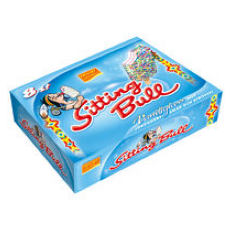

In [7]:
random_image = np.random.randint(0, len(img_names))
img = load_img(img_path, img_names[random_image])
plot_img(img)
# plt.imshow(img)
# plt.axis('off')
# plt.show()